In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1sJEuhep_4HgwJyz4K8E3DDT6ngDLIHNjKk6xY6MDnYA/export?format=csv'
df = pd.read_csv(url)

In [ ]:
df.Date = pd.to_datetime(df.Date, dayfirst=True)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-06-30,90.481,89.3090,90.5540,89.2350,NaN,1.32%
1,2024-06-23,89.298,89.3460,89.6590,89.1120,NaN,-0.06%
2,2024-06-16,89.352,89.3723,89.7470,89.1860,NaN,-0.05%
3,2024-06-09,89.395,90.1830,90.5815,89.1140,NaN,-0.90%
4,2024-06-02,90.203,90.5530,91.0595,89.9995,NaN,-0.26%


In [ ]:
df.Date.describe()

count                   1487
mean     2010-04-04 00:00:00
min      1996-01-07 00:00:00
25%      2003-02-19 12:00:00
50%      2010-04-04 00:00:00
75%      2017-05-17 12:00:00
max      2024-06-30 00:00:00
Name: Date, dtype: object

In [ ]:
df.set_index('Date', inplace=True)
df = df.sort_index(ascending=True, axis=0)

In [ ]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1996-01-07,45.8130,45.774,45.8130,45.774,NaN,0.71%
1996-01-14,44.7285,44.692,44.7285,44.692,NaN,-2.37%
1996-01-21,44.0815,43.941,44.0815,43.941,NaN,-1.45%
1996-01-28,45.5075,45.427,45.5075,45.427,NaN,3.23%
1996-02-04,45.9310,45.841,45.9310,45.841,NaN,0.93%


In [ ]:
df=df.asfreq('W')

In [ ]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1996-01-07,45.8130,45.774,45.8130,45.774,NaN,0.71%
1996-01-14,44.7285,44.692,44.7285,44.692,NaN,-2.37%
1996-01-21,44.0815,43.941,44.0815,43.941,NaN,-1.45%
1996-01-28,45.5075,45.427,45.5075,45.427,NaN,3.23%
1996-02-04,45.9310,45.841,45.9310,45.841,NaN,0.93%


In [ ]:
df.isna().sum()

Price          0
Open           0
High           0
Low            0
Vol.        1487
Change %       0
dtype: int64

In [ ]:
df = df.drop('Vol.',axis = 1)
df.head()

,Price,Open,High,Low,Change %
Date,,,,,
1996-01-07,45.8130,45.774,45.8130,45.774,0.71%
1996-01-14,44.7285,44.692,44.7285,44.692,-2.37%
1996-01-21,44.0815,43.941,44.0815,43.941,-1.45%
1996-01-28,45.5075,45.427,45.5075,45.427,3.23%
1996-02-04,45.9310,45.841,45.9310,45.841,0.93%


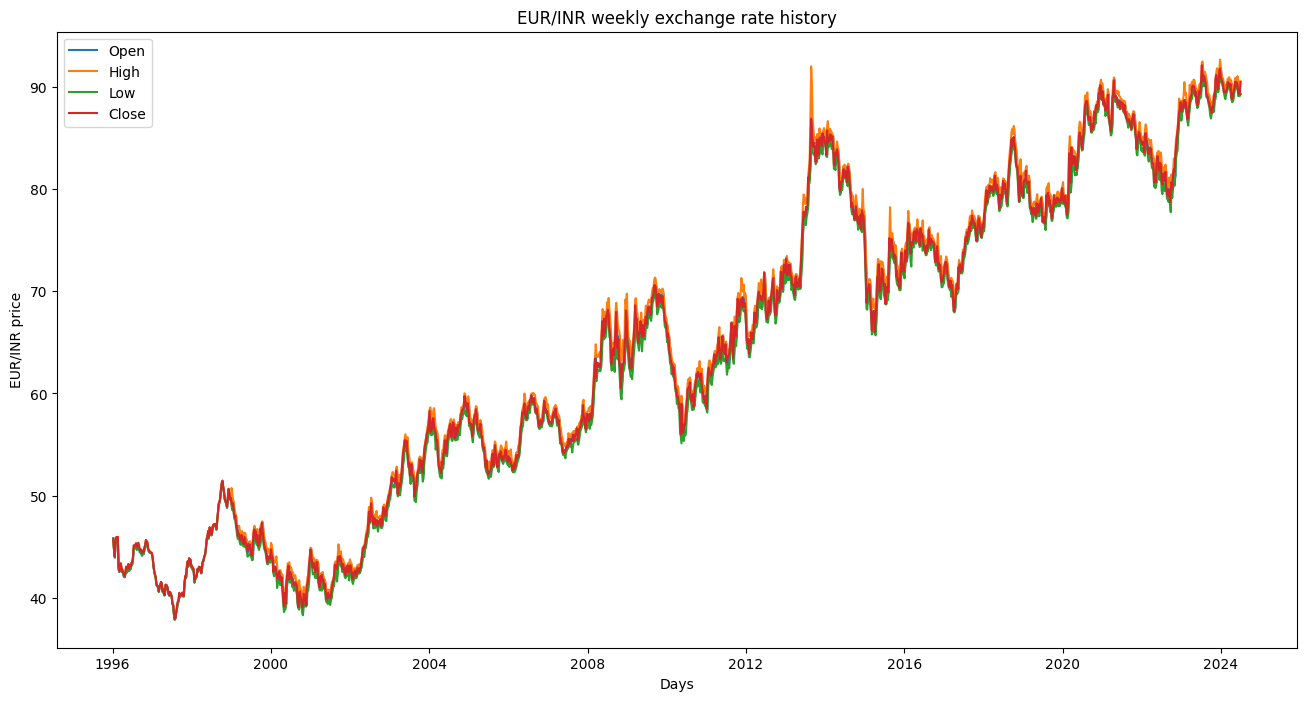

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df["Open"])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Price"])
plt.title('EUR/INR weekly exchange rate history')
plt.ylabel('EUR/INR price')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

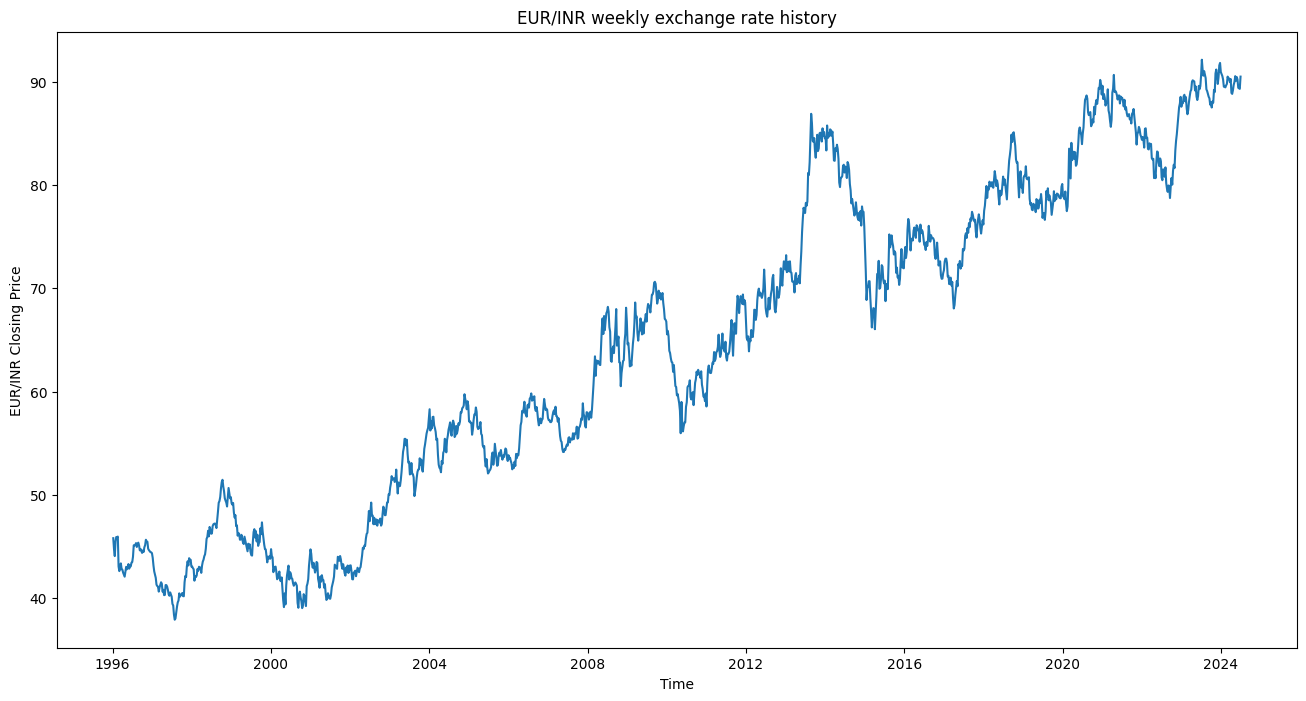

In [ ]:
plt.figure(figsize=(16,8))
plt.title('EUR/INR weekly exchange rate history')
plt.ylabel('EUR/INR Closing Price')
plt.xlabel('Time')
plt.plot(df['Price'], label='Close Price history')

In [ ]:
size = int(len(df)*0.8)
train = df.iloc[:size]
test = df.iloc[size:]

In [ ]:
train

,Price,Open,High,Low,Change %,wn
Date,,,,,,
1996-01-07,45.8130,45.7740,45.8130,45.7740,0.71,67.502267
1996-01-14,44.7285,44.6920,44.7285,44.6920,-2.37,79.036004
1996-01-21,44.0815,43.9410,44.0815,43.9410,-1.45,41.048796
1996-01-28,45.5075,45.4270,45.5075,45.4270,3.23,81.805240
1996-02-04,45.9310,45.8410,45.9310,45.8410,0.93,66.567500
...,...,...,...,...,...,...
2018-09-16,84.8630,83.5610,85.5730,83.5135,1.55,86.418229
2018-09-23,84.1580,84.8820,85.9020,83.8690,-0.83,53.010826
2018-09-30,84.9990,84.1660,85.3505,83.9000,1.00,21.198455


In [ ]:
test

,Price,Open,High,Low,Change %,wn
Date,,,,,,
2018-10-21,83.775,84.4325,84.6785,83.1375,-0.82,101.750880
2018-10-28,82.467,83.7960,84.0780,82.3755,-1.56,43.913031
2018-11-04,82.143,82.5200,83.7090,82.0150,-0.39,67.153562
2018-11-11,82.181,82.1270,82.5610,81.2465,0.05,38.008089
2018-11-18,80.117,82.1075,82.2285,80.0205,-2.51,66.513642
...,...,...,...,...,...,...
2024-06-02,90.203,90.5530,91.0595,89.9995,-0.26,57.858069
2024-06-09,89.395,90.1830,90.5815,89.1140,-0.90,51.514653
2024-06-16,89.352,89.3723,89.7470,89.1860,-0.05,45.019775


**WHITE NOISE**

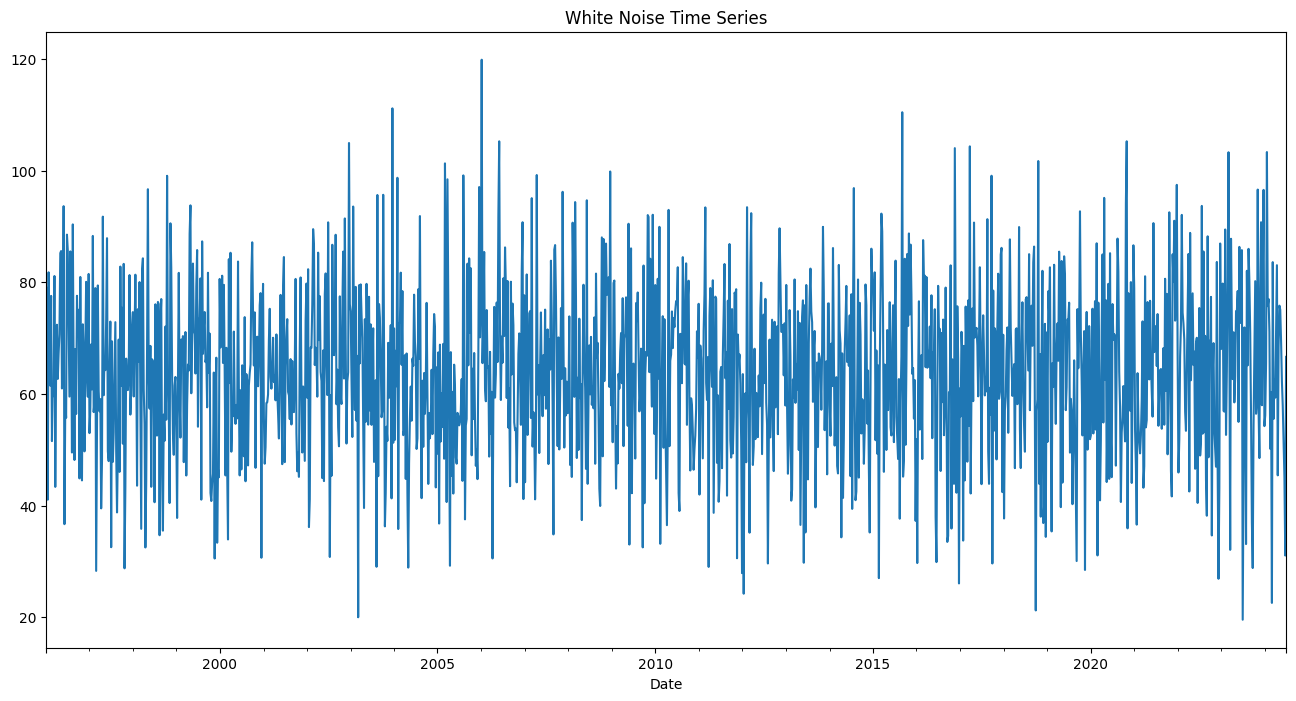

In [ ]:
import numpy as np
wn = np.random.normal(loc = df['Price'].mean(), scale = df['Price'].std(), size = len(df))
df['wn'] = wn
df.wn.plot(figsize=(16,8))
plt.title('White Noise Time Series')
plt.show()

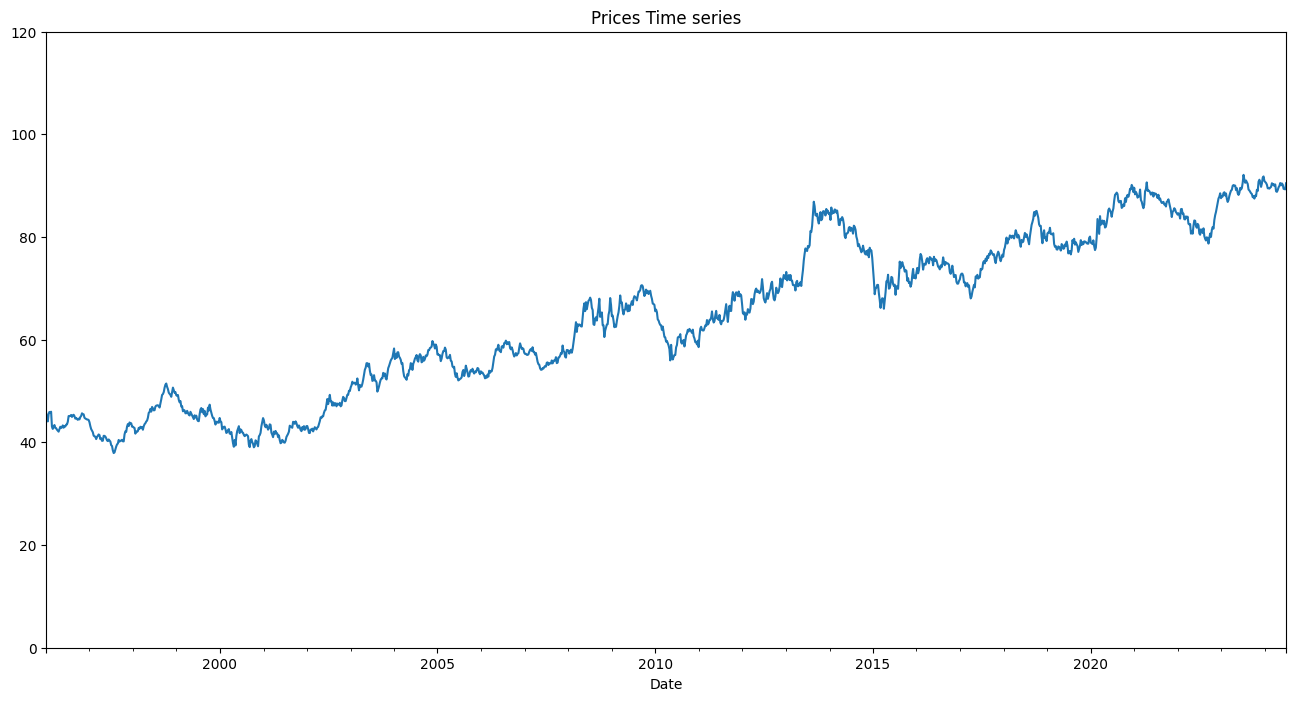

In [ ]:
df.Price.plot(figsize=(16,8))
plt.ylim(0,120)
plt.title('Prices Time series')
plt.show()

**SEASONALITY**

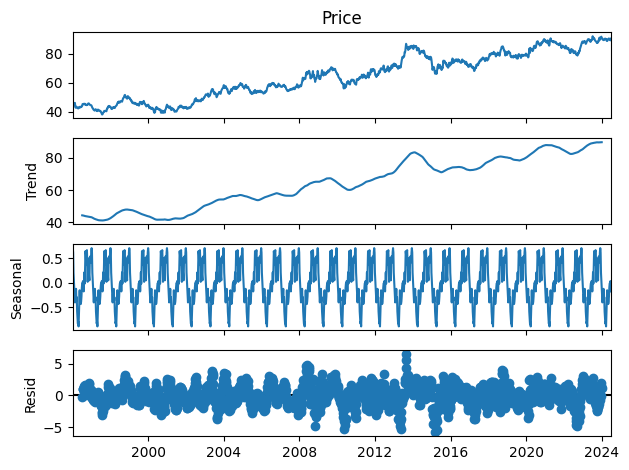

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Price'], model='additive')
result.plot()
plt.show()

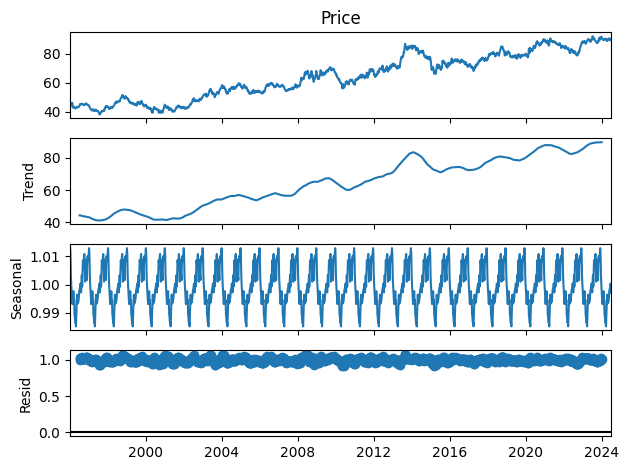

In [ ]:
result1 = seasonal_decompose(df['Price'], model='multiplicative')
result1.plot()
plt.show()

**STATIONARITY**

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['Price'])

(-0.8141258647229906,
 0.8149374458845096,
 11,
 1475,
 {'1%': -3.434791163965702,
  '5%': -2.8635014840083945,
  '10%': -2.5678142741740877},
 3619.0644906269936)

Non stationarity

In [ ]:
df['Change %'] = df['Change %'].str.rstrip('%').astype('float') / 100.0
df.head()


,Price,Open,High,Low,Change %,wn
Date,,,,,,
1996-01-07,45.8130,45.774,45.8130,45.774,0.0071,67.502267
1996-01-14,44.7285,44.692,44.7285,44.692,-0.0237,79.036004
1996-01-21,44.0815,43.941,44.0815,43.941,-0.0145,41.048796
1996-01-28,45.5075,45.427,45.5075,45.427,0.0323,81.805240
1996-02-04,45.9310,45.841,45.9310,45.841,0.0093,66.567500


In [ ]:
df['Change %'] = df['Change %'].mul(100)
df.head()

,Price,Open,High,Low,Change %,wn
Date,,,,,,
1996-01-07,45.8130,45.774,45.8130,45.774,0.71,67.502267
1996-01-14,44.7285,44.692,44.7285,44.692,-2.37,79.036004
1996-01-21,44.0815,43.941,44.0815,43.941,-1.45,41.048796
1996-01-28,45.5075,45.427,45.5075,45.427,3.23,81.805240
1996-02-04,45.9310,45.841,45.9310,45.841,0.93,66.567500


In [ ]:
adfuller(df['Change %'])

(-11.100237060023234,
 3.8817438858348926e-20,
 10,
 1476,
 {'1%': -3.4347881497897688,
  '5%': -2.8635001537551923,
  '10%': -2.567813565797108},
 -8536.890244623226)

Stationary

**ACF**

Indirect relations also considered

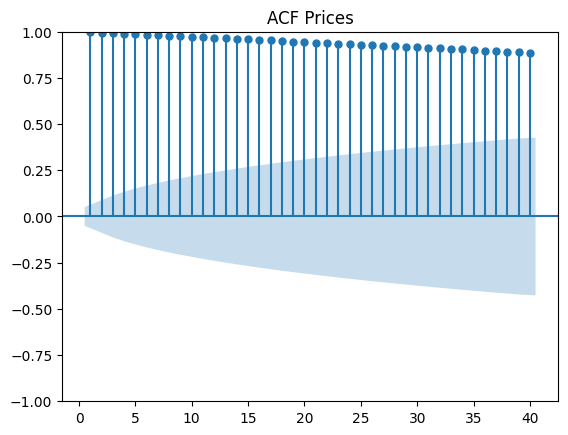

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Price'], lags = 40, zero = False)
plt.title('ACF Prices')
plt.show()

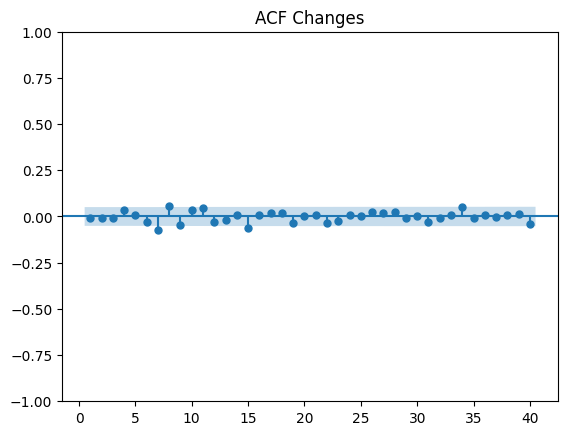

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Change %'], lags = 40, zero = False)
plt.title('ACF Changes')
plt.show()

**PACF**

It cancels out all additional channels a previous period value affects the present one

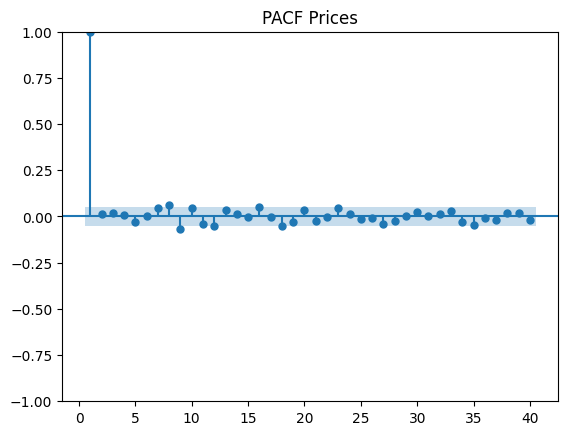

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Price'], lags = 40, zero = False, method = 'ols')
plt.title('PACF Prices')
plt.show()

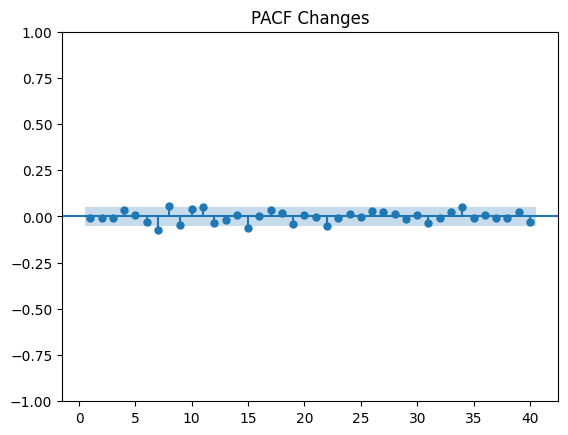

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Change %'], lags = 40, zero = False, method = 'ols')
plt.title('PACF Changes')
plt.show()

**AR model**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# --- Assuming 'train' and 'test' are your Pandas DataFrames ---
# --- with a 'change %' column and datetime index ---

# Fit ARIMA(7, 0, 0) model to the training data
model1 = ARIMA(train['Change %'], order=(7, 0, 0))
model_fit = model1.fit()

# Generate predictions for the test set (percentage changes)
predicted_pct_changes = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Get the initial price (price at the beginning of the test set)
initial_price = train['Price'].iloc[-1]

# Calculate predicted prices
predicted_prices = [initial_price]
for pct_change in predicted_pct_changes:
    new_price = predicted_prices[-1] * (1 + pct_change / 100)
    predicted_prices.append(new_price)

# Remove the initial price (it was just a starting point)
predicted_prices = predicted_prices[1:]

# Create a DataFrame for predicted prices
rmse = np.sqrt(np.mean(np.power((np.array(test['Price']) - predicted_prices), 2)))
print('RMSE value on test set:')
print(rmse)


RMSE value on test set:
8.418261072377563


RMSE value on test set:
8.418261072377563


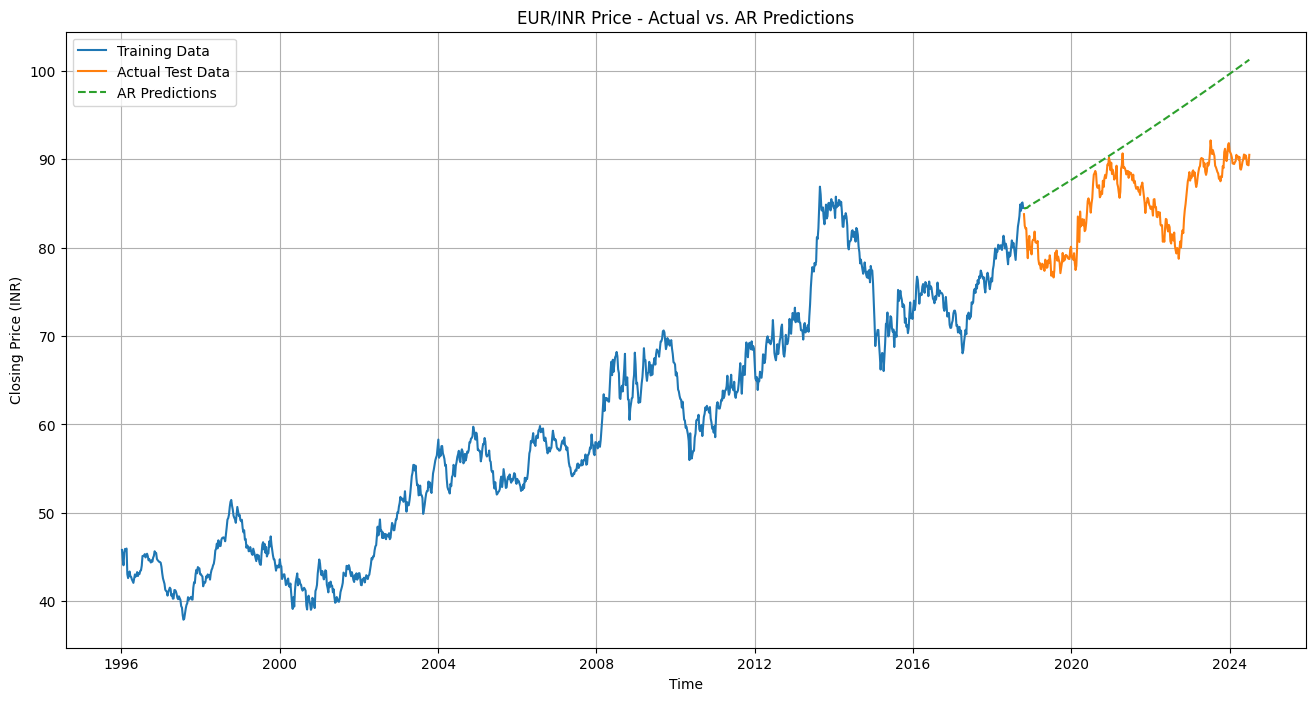

In [ ]:
# Calculate RMSE (replace 'preds' with 'predicted_prices')
rms = np.sqrt(np.mean(np.power((np.array(test['Price']) - predicted_prices), 2)))
print('RMSE value on test set:')
print(rms)

# Plot actual vs. predicted values (fill in the blank in test[''])
predicted_df = pd.DataFrame({
    'Date': test.index,
    'Predictions': predicted_prices
})
predicted_df.set_index('Date', inplace=True)

# Plot the results
plt.figure(figsize=(16,8))
plt.title('EUR/INR Price - Actual vs. AR Predictions') # Adjust the title as needed
plt.ylabel('Closing Price (INR)')
plt.xlabel('Time')

# Plot training data
plt.plot(train['Price'], label='Training Data')

# Plot actual and predicted test data
plt.plot(test['Price'], label='Actual Test Data')
plt.plot(predicted_df['Predictions'], label='AR Predictions', linestyle='--')

plt.legend()
plt.grid(True)
plt.show()

**Moving Average**

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train' and 'test' are your DataFrames with a 'Change %' column
# and a datetime index

# Fit ARIMA(0, 0, 11) model to the training data
Model0 = ARIMA(train['Change %'], order=(0, 0, 11))
model_fit = Model0.fit()  # Make sure to fit the correct Model0

# Generate predictions for the test set (percentage changes)
predicted_pct_changes = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Get the initial price (price at the beginning of the test set)
initial_price = train['Price'].iloc[-1]  # Assuming you have a 'Price' column

# Calculate predicted prices
predicted_prices = [initial_price]
for pct_change in predicted_pct_changes:
    new_price = predicted_prices[-1] * (1 + pct_change / 100)
    predicted_prices.append(new_price)

# Remove the initial price (it was just a starting point)
predicted_prices = predicted_prices[1:]

# Calculate RMSE
rmse = np.sqrt(np.mean(np.power((np.array(test['Price']) - predicted_prices), 2)))
print('RMSE value on test set:')
print(rmse)

RMSE value on test set:
9.009504948784764


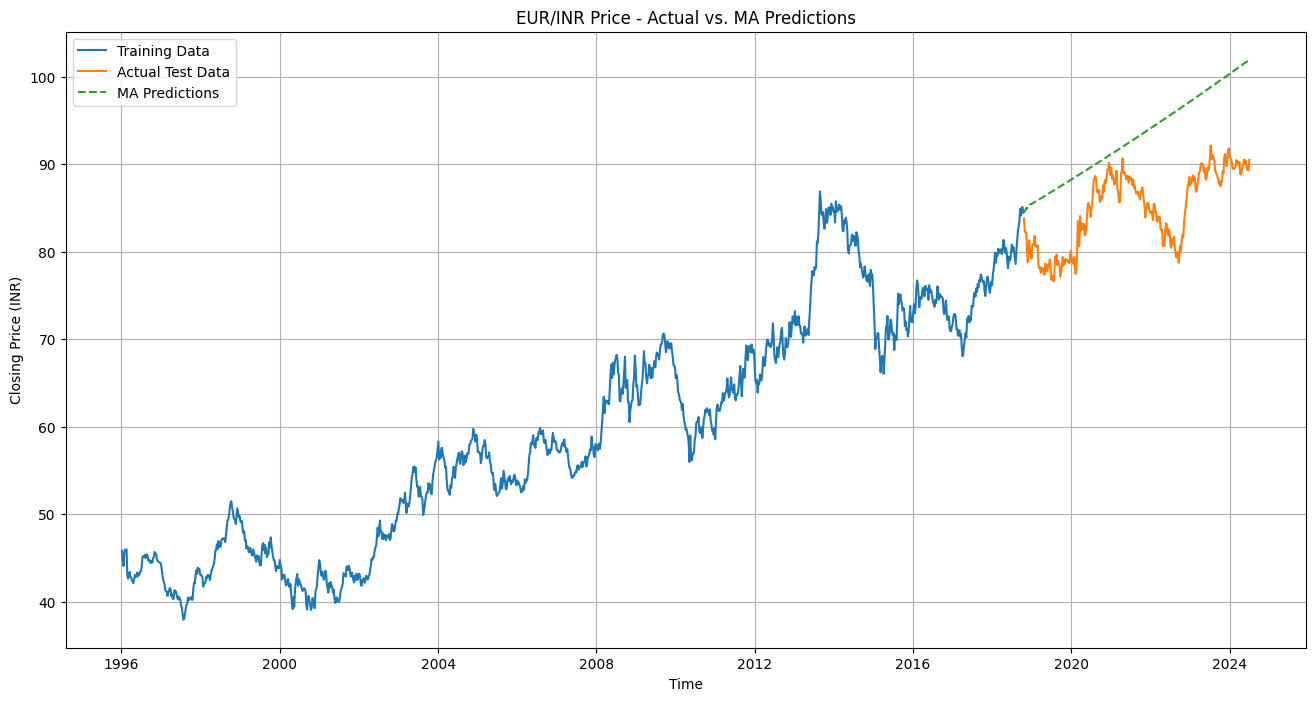

In [ ]:
import matplotlib.pyplot as plt

# ... (Your previous code for fitting the ARIMA model and generating predictions)

# Create a DataFrame for predicted prices with a 'Predictions' column
predicted_df = pd.DataFrame({
    'Date': test.index,
    'Predictions': predicted_prices
})
predicted_df.set_index('Date', inplace=True)

# Plot the results
plt.figure(figsize=(16,8))
plt.title('EUR/INR Price - Actual vs. MA Predictions') # Adjust the title as needed
plt.ylabel('Closing Price (INR)')
plt.xlabel('Time')

# Plot training data
plt.plot(train['Price'], label='Training Data')

# Plot actual and predicted test data
plt.plot(test['Price'], label='Actual Test Data')
plt.plot(predicted_df['Predictions'], label='MA Predictions', linestyle='--')

plt.legend()
plt.grid(True)
plt.show()

**SARIMA** **MODEL**

In [ ]:
#!pip install pmdarima

import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

# Assuming 'train' and 'test' are your DataFrames with a 'Price' column
# and a datetime index

# Use auto_arima to find optimal (p, d, q) and (P, D, Q, s) orders
# For weekly data, set m=52
model_auto = auto_arima(train['Price'], start_p=1, start_q=1,
                      max_p=1, max_q=1, m= 24,  # Set 'm' to 52 for weekly seasonality
                      start_P=0, seasonal=True,
                      d=1, D=1, trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Fit the SARIMA model
model = SARIMAX(train['Price'],
                order=model_auto.order,  # Use orders from auto_arima
                seasonal_order=model_auto.seasonal_order)
results = model.fit()

# Make predictions
predictions = results.get_forecast(steps=len(test))
predicted_values = predictions.predicted_mean

# Evaluate the model (e.g., calculate RMSE)
rmse = np.sqrt(np.mean((predicted_values - test['Price'])**2))
print('RMSE:', rmse)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[24]             : AIC=inf, Time=33.89 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=3669.596, Time=0.29 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=3374.852, Time=2.19 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=23.71 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=3671.458, Time=0.20 sec
 ARIMA(1,1,0)(2,1,0)[24]             : AIC=3271.466, Time=5.80 sec
 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=54.87 sec
 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=17.75 sec
 ARIMA(0,1,0)(2,1,0)[24]             : AIC=3269.580, Time=5.52 sec
 ARIMA(0,1,0)(1,1,0)[24]             : AIC=3373.481, Time=1.14 sec
 ARIMA(0,1,0)(2,1,1)[24]             : AIC=inf, Time=40.17 sec
 ARIMA(0,1,0)(1,1,1)[24]             : AIC=inf, Time=19.33 sec
 ARIMA(0,1,1)(2,1,0)[24]             : AIC=3271.466, Time=4.67 sec
 ARIMA(1,1,1)(2,1,0)[24]             : AIC=3273.473, Time=4.90 sec
 ARIMA(0,1,0)(2,1,0)[24] intercept   : AIC=

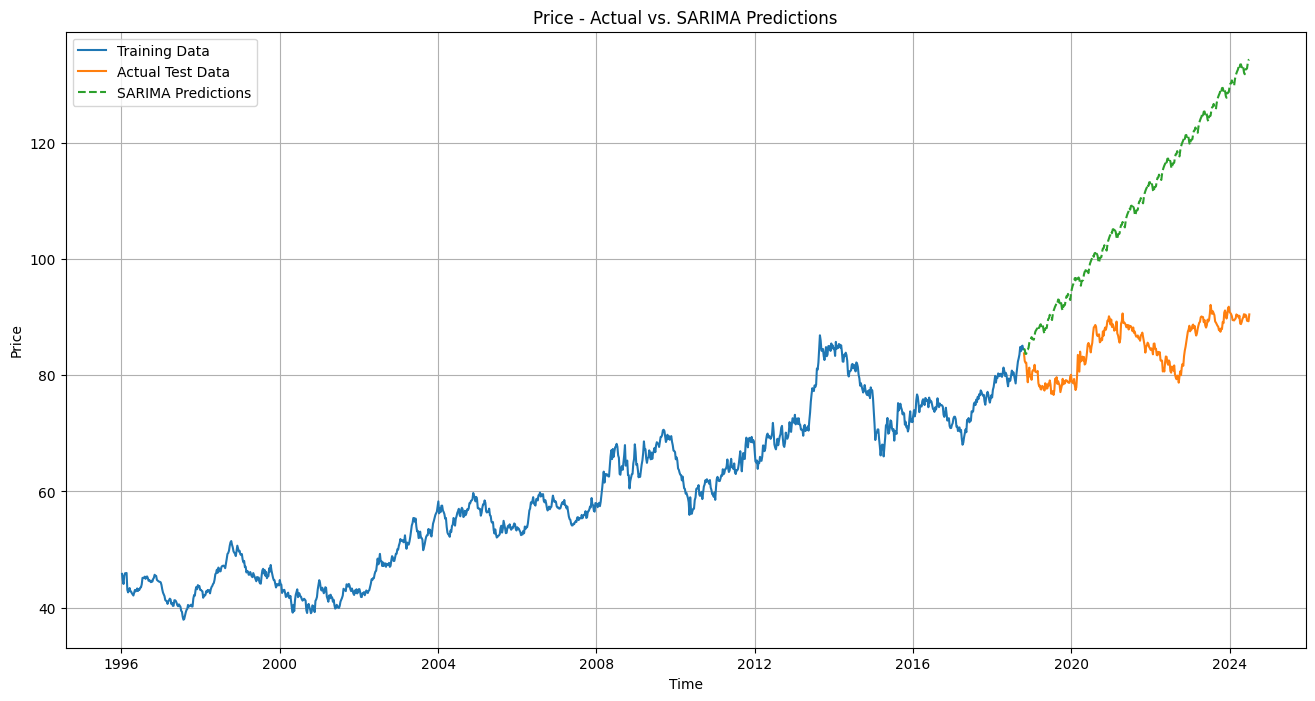

In [ ]:
predicted_df = pd.DataFrame({
    'Date': test.index,
    'Predictions': predicted_values
})
predicted_df.set_index('Date', inplace=True)

# Plot the results
plt.figure(figsize=(16,8))
plt.title('Price - Actual vs. SARIMA Predictions')
plt.ylabel('Price')
plt.xlabel('Time')

# Plot training data
plt.plot(train['Price'], label='Training Data')

# Plot actual and predicted test data
plt.plot(test['Price'], label='Actual Test Data')
plt.plot(predicted_df['Predictions'], label='SARIMA Predictions', linestyle='--')

plt.legend()
plt.grid(True)
plt.show()

**LSTM** **Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
dataset = df[['Price']]
train1 = train[['Price']]
valid1 = test[['Price']]
dataset = dataset.values
train = train1.values
valid = valid1.values

In [ ]:
scaled_data = scaler.fit_transform(dataset)

In [ ]:
past_values = 60
x_train, y_train = [], []
for i in range(past_values, len(train)):
    x_train.append(scaled_data[i-past_values:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
1129/1129 - 43s - loss: 0.0024 - 43s/epoch - 38ms/step
Epoch 2/5
1129/1129 - 31s - loss: 9.3924e-04 - 31s/epoch - 28ms/step
Epoch 3/5
1129/1129 - 31s - loss: 7.5094e-04 - 31s/epoch - 28ms/step
Epoch 4/5
1129/1129 - 33s - loss: 5.7861e-04 - 33s/epoch - 29ms/step
Epoch 5/5
1129/1129 - 31s - loss: 4.8591e-04 - 31s/epoch - 28ms/step


In [ ]:
inputs = dataset[len(dataset) - len(valid) - past_values:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(past_values, inputs.shape[0]):
    X_test.append(inputs[i-past_values:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print('RMSE value on validation set:')
print(rms)

10/10 [==============================] - 2s 28ms/step
RMSE value on validation set:
0.969619812419414


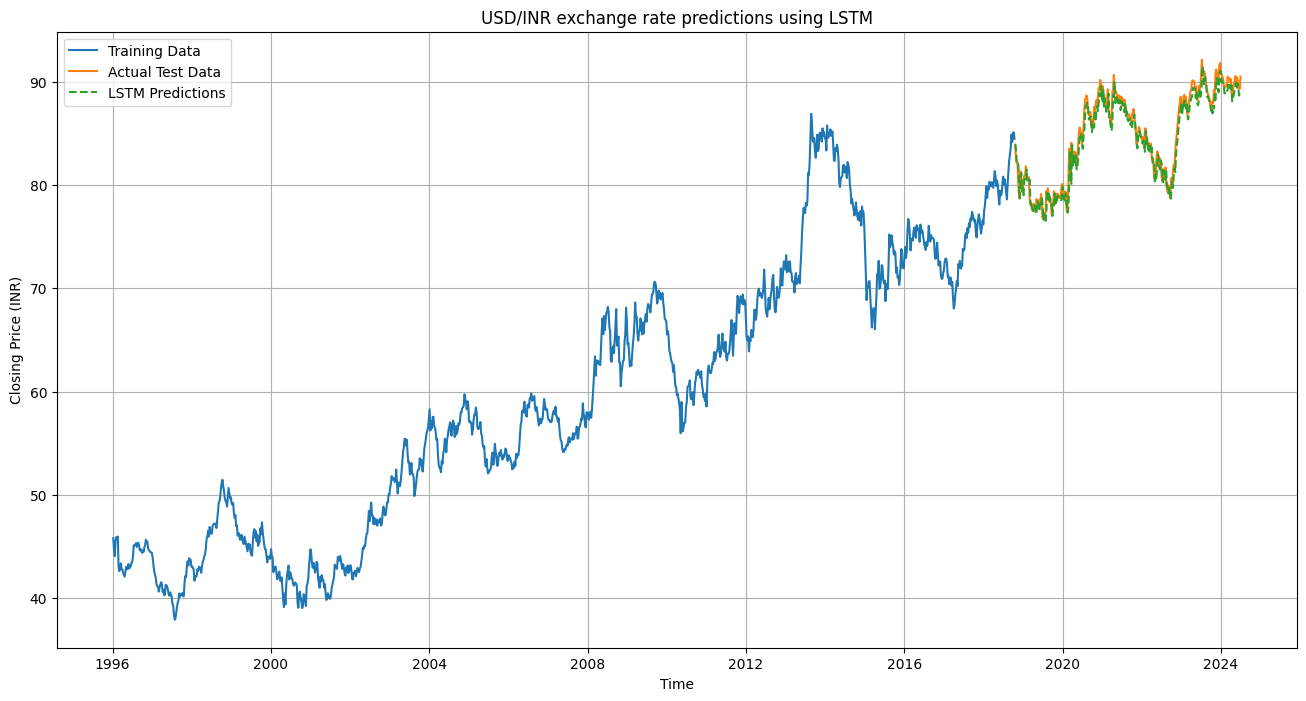

In [ ]:
plt.figure(figsize=(16,8))
plt.title('USD/INR exchange rate predictions using LSTM')
plt.ylabel('Closing Price (INR)')
plt.xlabel('Time')

# Assuming 'df' is the original DataFrame containing the training data
train = df.iloc[:len(df)-len(test)] # Recreate the train DataFrame
plt.plot(train['Price'], label='Training Data')

valid = test[['Price']]
valid = valid.assign(Predictions = 0)
valid = valid.assign(Predictions = closing_price)
plt.plot(valid['Price'], label='Actual Test Data')
plt.plot(valid['Predictions'], label='LSTM Predictions', linestyle='--')

plt.legend()
plt.grid(True)
plt.show()

**ARCH and GARCH for voltality prediction**

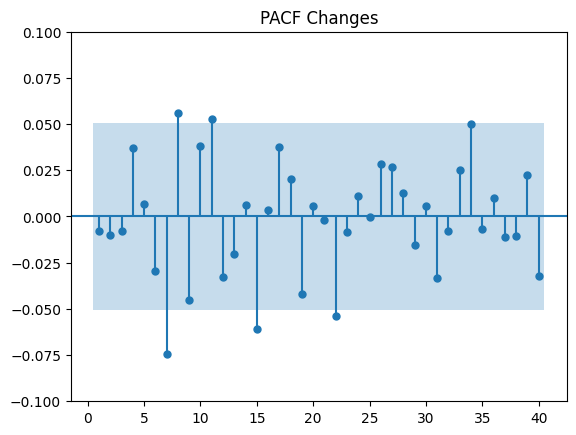

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Change %'], lags = 40, zero = False, method = 'ols')
plt.ylim(-0.1,0.1)
plt.title('PACF Changes')
plt.show()

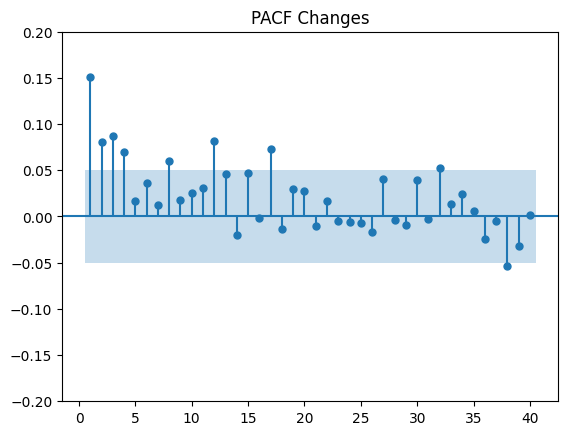

In [ ]:
df['sq_Change %']=df['Change %'].mul(df['Change %'])
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['sq_Change %'], lags = 40, zero = False, method = 'ols')
plt.ylim(-0.2,0.2)
plt.title('PACF Changes')
plt.show()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2051792157.4436896
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3978.8395233554265
Iteration:      3,   Func. Count:     22,   Neg. LLF: 4916.47909528958
Iteration:      4,   Func. Count:     29,   Neg. LLF: 2065.6197290388654
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2036.911316854556
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2036.906649718579
Iteration:      7,   Func. Count:     48,   Neg. LLF: 2036.906327492342
Iteration:      8,   Func. Count:     53,   Neg. LLF: 2036.9063253784927
Iteration:      9,   Func. Count:     57,   Neg. LLF: 2036.9063253751456
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2036.9063253784927
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:               Change %   R-squared:           

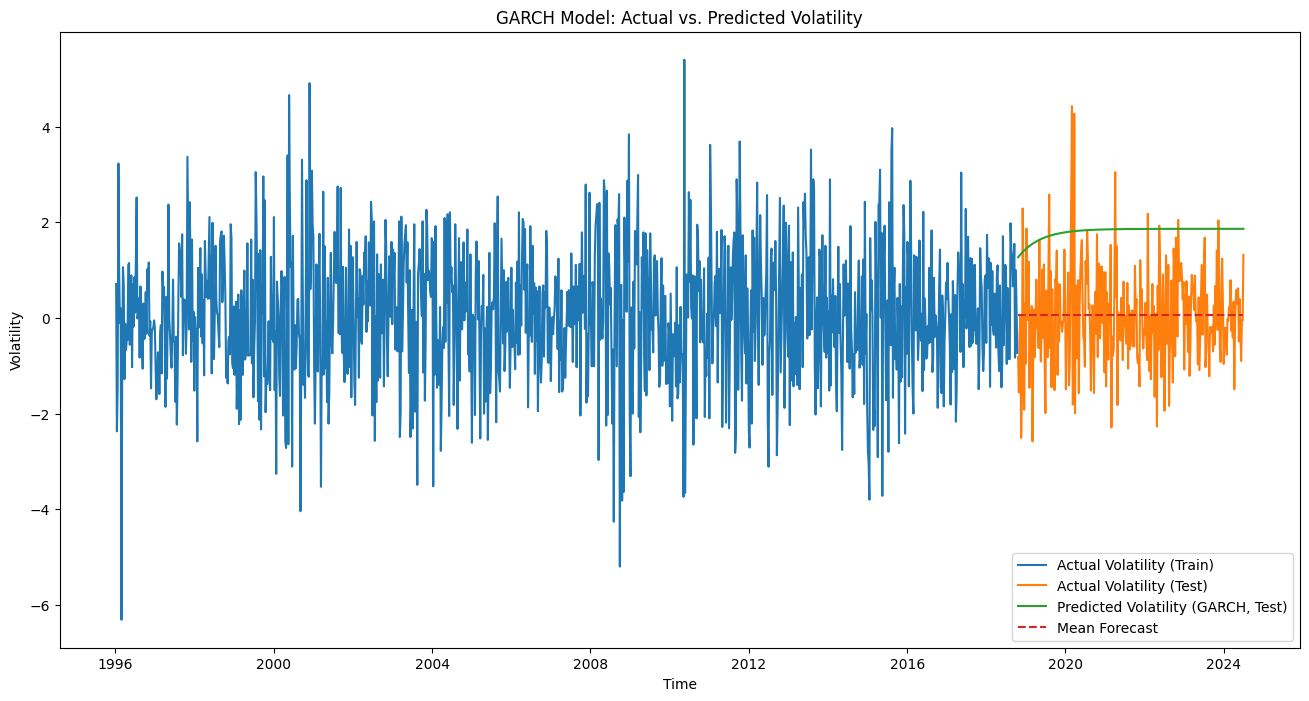

In [ ]:
import matplotlib.pyplot as plt
from arch import arch_model

# --- Model Fitting ---
# (Re-examine this section carefully to ensure it aligns with your data and expectations)

# Fit a GARCH(1,1) model
garch_model_result = arch_model(train['Change %'], vol='GARCH', p=1, q=1)
garch_results = garch_model_result.fit()
print(garch_results.summary())  # Check the model summary for any red flags

# --- Forecasting ---
# (Make sure the horizon and how you're using the forecast align with your needs)

# Forecast volatility on the test set (using mean as a simple baseline for comparison)
garch_forecast_variance = garch_results.forecast(horizon=len(test), reindex=False).variance
mean_forecast = train['Change %'].mean()  # Simple baseline

# --- Plotting ---
# (Adjust plot settings for clarity if needed)

plt.figure(figsize=(16, 8))

# Plot training data
plt.plot(train.index, train['Change %'], label='Actual Volatility (Train)')

# Plot test data
plt.plot(test.index, test['Change %'], label='Actual Volatility (Test)')

# Plot predicted volatility for the test set (variance and a simple mean baseline)
plt.plot(test.index, garch_forecast_variance.iloc[0], label='Predicted Volatility (GARCH, Test)')
plt.plot(test.index, [mean_forecast] * len(test), label='Mean Forecast', linestyle='--')

plt.title('GARCH Model: Actual vs. Predicted Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4277.298752845301
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2148.3089653927664
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1702420.3266917567
Iteration:      4,   Func. Count:     32,   Neg. LLF: 2060.942677334926
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2060.8876013917734
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2055.171042588144
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2055.1082756370934
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2055.0272420119327
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2055.0272420119486
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2055.0272420119327
            Iterations: 9
            Function evaluations: 65
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:               Change %   R-squared:         

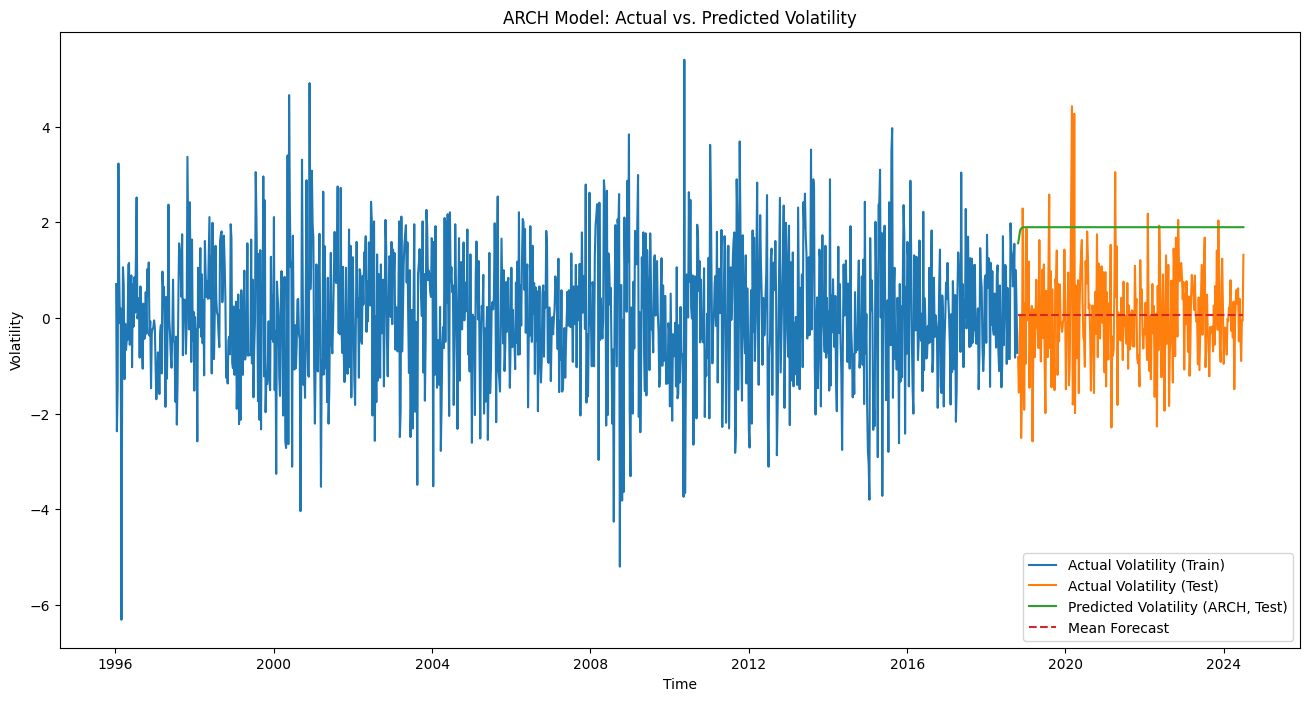

In [ ]:
import matplotlib.pyplot as plt
from arch import arch_model

# --- Model Fitting ---

# Fit an ARCH(3) model
arch_model_result = arch_model(train['Change %'], vol='ARCH', p=3)
arch_results = arch_model_result.fit()
print(arch_results.summary())  # Check the model summary

# --- Forecasting ---

# Forecast volatility on the test set (using mean as a simple baseline)
arch_forecast_variance = arch_results.forecast(horizon=len(test), reindex=False).variance
mean_forecast = train['Change %'].mean()

# --- Plotting ---

plt.figure(figsize=(16, 8))

# Plot training data
plt.plot(train.index, train['Change %'], label='Actual Volatility (Train)')

# Plot test data
plt.plot(test.index, test['Change %'], label='Actual Volatility (Test)')

# Plot predicted volatility for the test set (variance and mean baseline)
plt.plot(test.index, arch_forecast_variance.iloc[0], label='Predicted Volatility (ARCH, Test)')
plt.plot(test.index, [mean_forecast] * len(test), label='Mean Forecast', linestyle='--')

plt.title('ARCH Model: Actual vs. Predicted Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()